In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Evaluation Libraries
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Hyperparameter Optimization Libraries
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import keras_tuner as kt

In [2]:
df=pd.read_excel("Flight_Fare.xlsx")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
print(df['Airline'].unique())
print(df['Source'].unique())
print(df['Destination'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [7]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [8]:
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_year'] = df['Date_of_Journey'].dt.year

In [9]:
df['Journey_year'].unique()

array([2019], dtype=int32)

In [10]:
df.drop(columns=['Date_of_Journey','Journey_year'], inplace=True)

In [11]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [12]:
df.drop(columns=['Additional_Info'], inplace=True)

In [13]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [14]:
df['Total_Stops'].isna().sum()

np.int64(1)

In [15]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10284\3351361124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)


In [16]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [17]:
df['Duration'] = (
    df['Duration'].str.extract(r'(\d+)h')[0].fillna(0).astype(int) * 60 +
    df['Duration'].str.extract(r'(\d+)m')[0].fillna(0).astype(int)
)

In [18]:
df["Arrival_Time"] = df["Arrival_Time"].astype(str)

time_mask = df["Arrival_Time"].str.match(r"^\d{1,2}:\d{2}$")

df.loc[time_mask, "datetime"] = pd.to_datetime(
    df.loc[time_mask, "Journey_month"].astype(str).str.zfill(2) + "-" +
    df.loc[time_mask, "Journey_day"].astype(str).str.zfill(2) + " " +
    df.loc[time_mask, "Arrival_Time"],
    format="%m-%d %H:%M"
)

df.loc[~time_mask, "datetime"] = pd.to_datetime(
    df.loc[~time_mask, "Arrival_Time"],
    format="mixed",
    errors="coerce"
)

df["Arrival_hour"] = df["datetime"].dt.hour
df["Arrival_minute"] = df["datetime"].dt.minute
df["Arrival_day"] = df["datetime"].dt.day
df["Arrival_month"] = df["datetime"].dt.month




C:\Users\Admin\AppData\Local\Temp\ipykernel_10284\2182511891.py:5: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  df.loc[time_mask, "datetime"] = pd.to_datetime(


In [19]:
df.drop(columns=['datetime','Arrival_Time'],inplace=True)

In [20]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_minute'] = df['Dep_Time'].dt.minute
df.drop(columns=['Dep_Time'],inplace=True)

In [21]:
df["Route_Legs"] = df["Route"].str.count("→") + 1
df["Route_Legs"] = df["Route_Legs"].fillna(1).astype(int)

df["Main_Layover"] = (df["Route"].fillna("Direct").str.split("→").apply(lambda x: x[1] if len(x) > 2 else "Direct"))

df.drop(['Route'], axis=1, inplace=True)

top_layovers = df["Main_Layover"].value_counts().nlargest(5).index

df["Main_Layover"] = df["Main_Layover"].where(
    df["Main_Layover"].isin(top_layovers),
    "Other"
)


In [22]:
cat_cols = ['Airline', 'Source', 'Destination', 'Main_Layover']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True,dtype=int)

In [30]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Arrival_hour', 'Arrival_minute', 'Arrival_day', 'Arrival_month',
       'Dep_hour', 'Dep_minute', 'Route_Legs', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Main_Layover_ BOM ',
       'Main_Layover_ DEL ', 'Main_Layover_ HYD ', 'Main_Layover_Direct',
       'Main_Layover_Other'],
      dtype='object')

In [38]:
num_cols=['Duration','Journey_day', 'Journey_month',
       'Arrival_hour', 'Arrival_minute', 'Arrival_day', 'Arrival_month',
       'Dep_hour', 'Dep_minute']

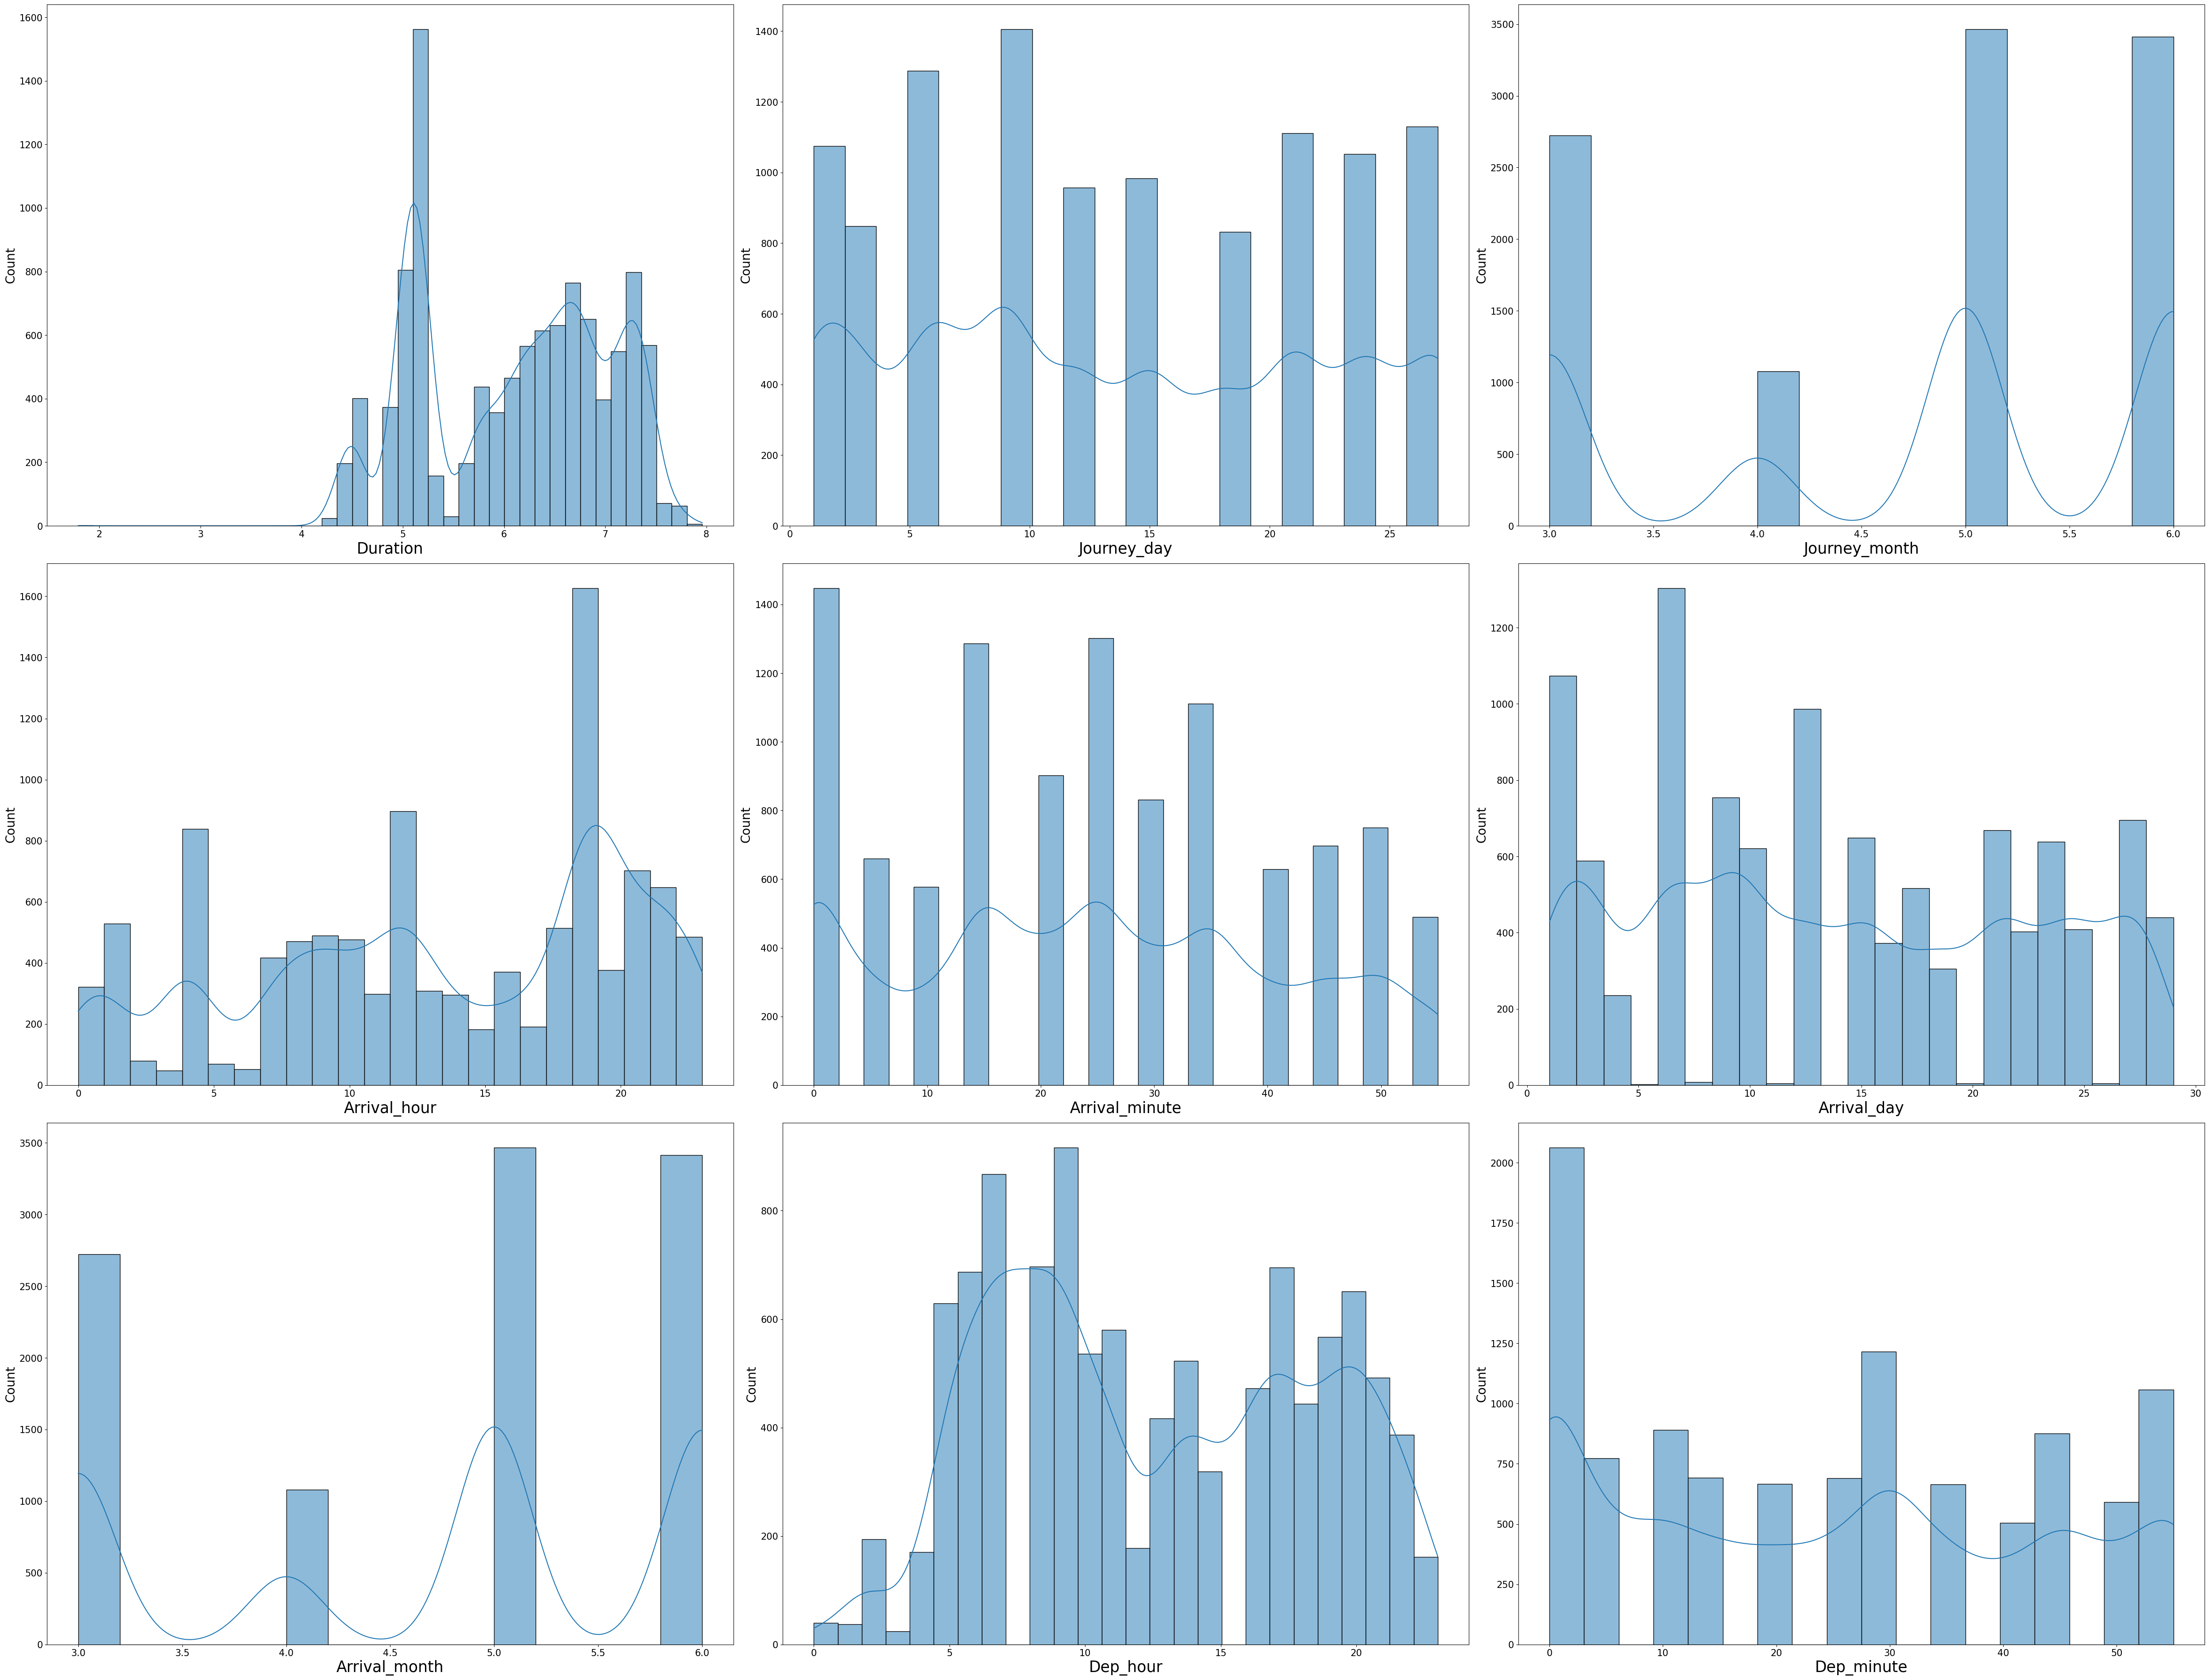

In [39]:
plt.figure(figsize=(50,50))
plot_num = 1

for col in num_cols:
    if plot_num <= 12:
        plt.subplot(4,3,plot_num)
        sns.histplot(df[col],kde=True)
        plt.xlabel(col,fontsize=25)
        plt.ylabel("Count",fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    plot_num = plot_num+1
plt.tight_layout()

In [27]:
df['Duration'].skew()

np.float64(0.8610740526194615)

<Axes: xlabel='Duration', ylabel='Count'>

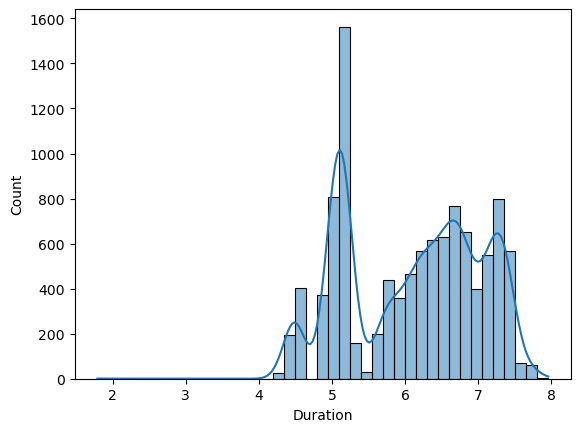

In [28]:
df['Duration'] = np.log1p(df['Duration'])  
sns.histplot(df['Duration'],kde=True)

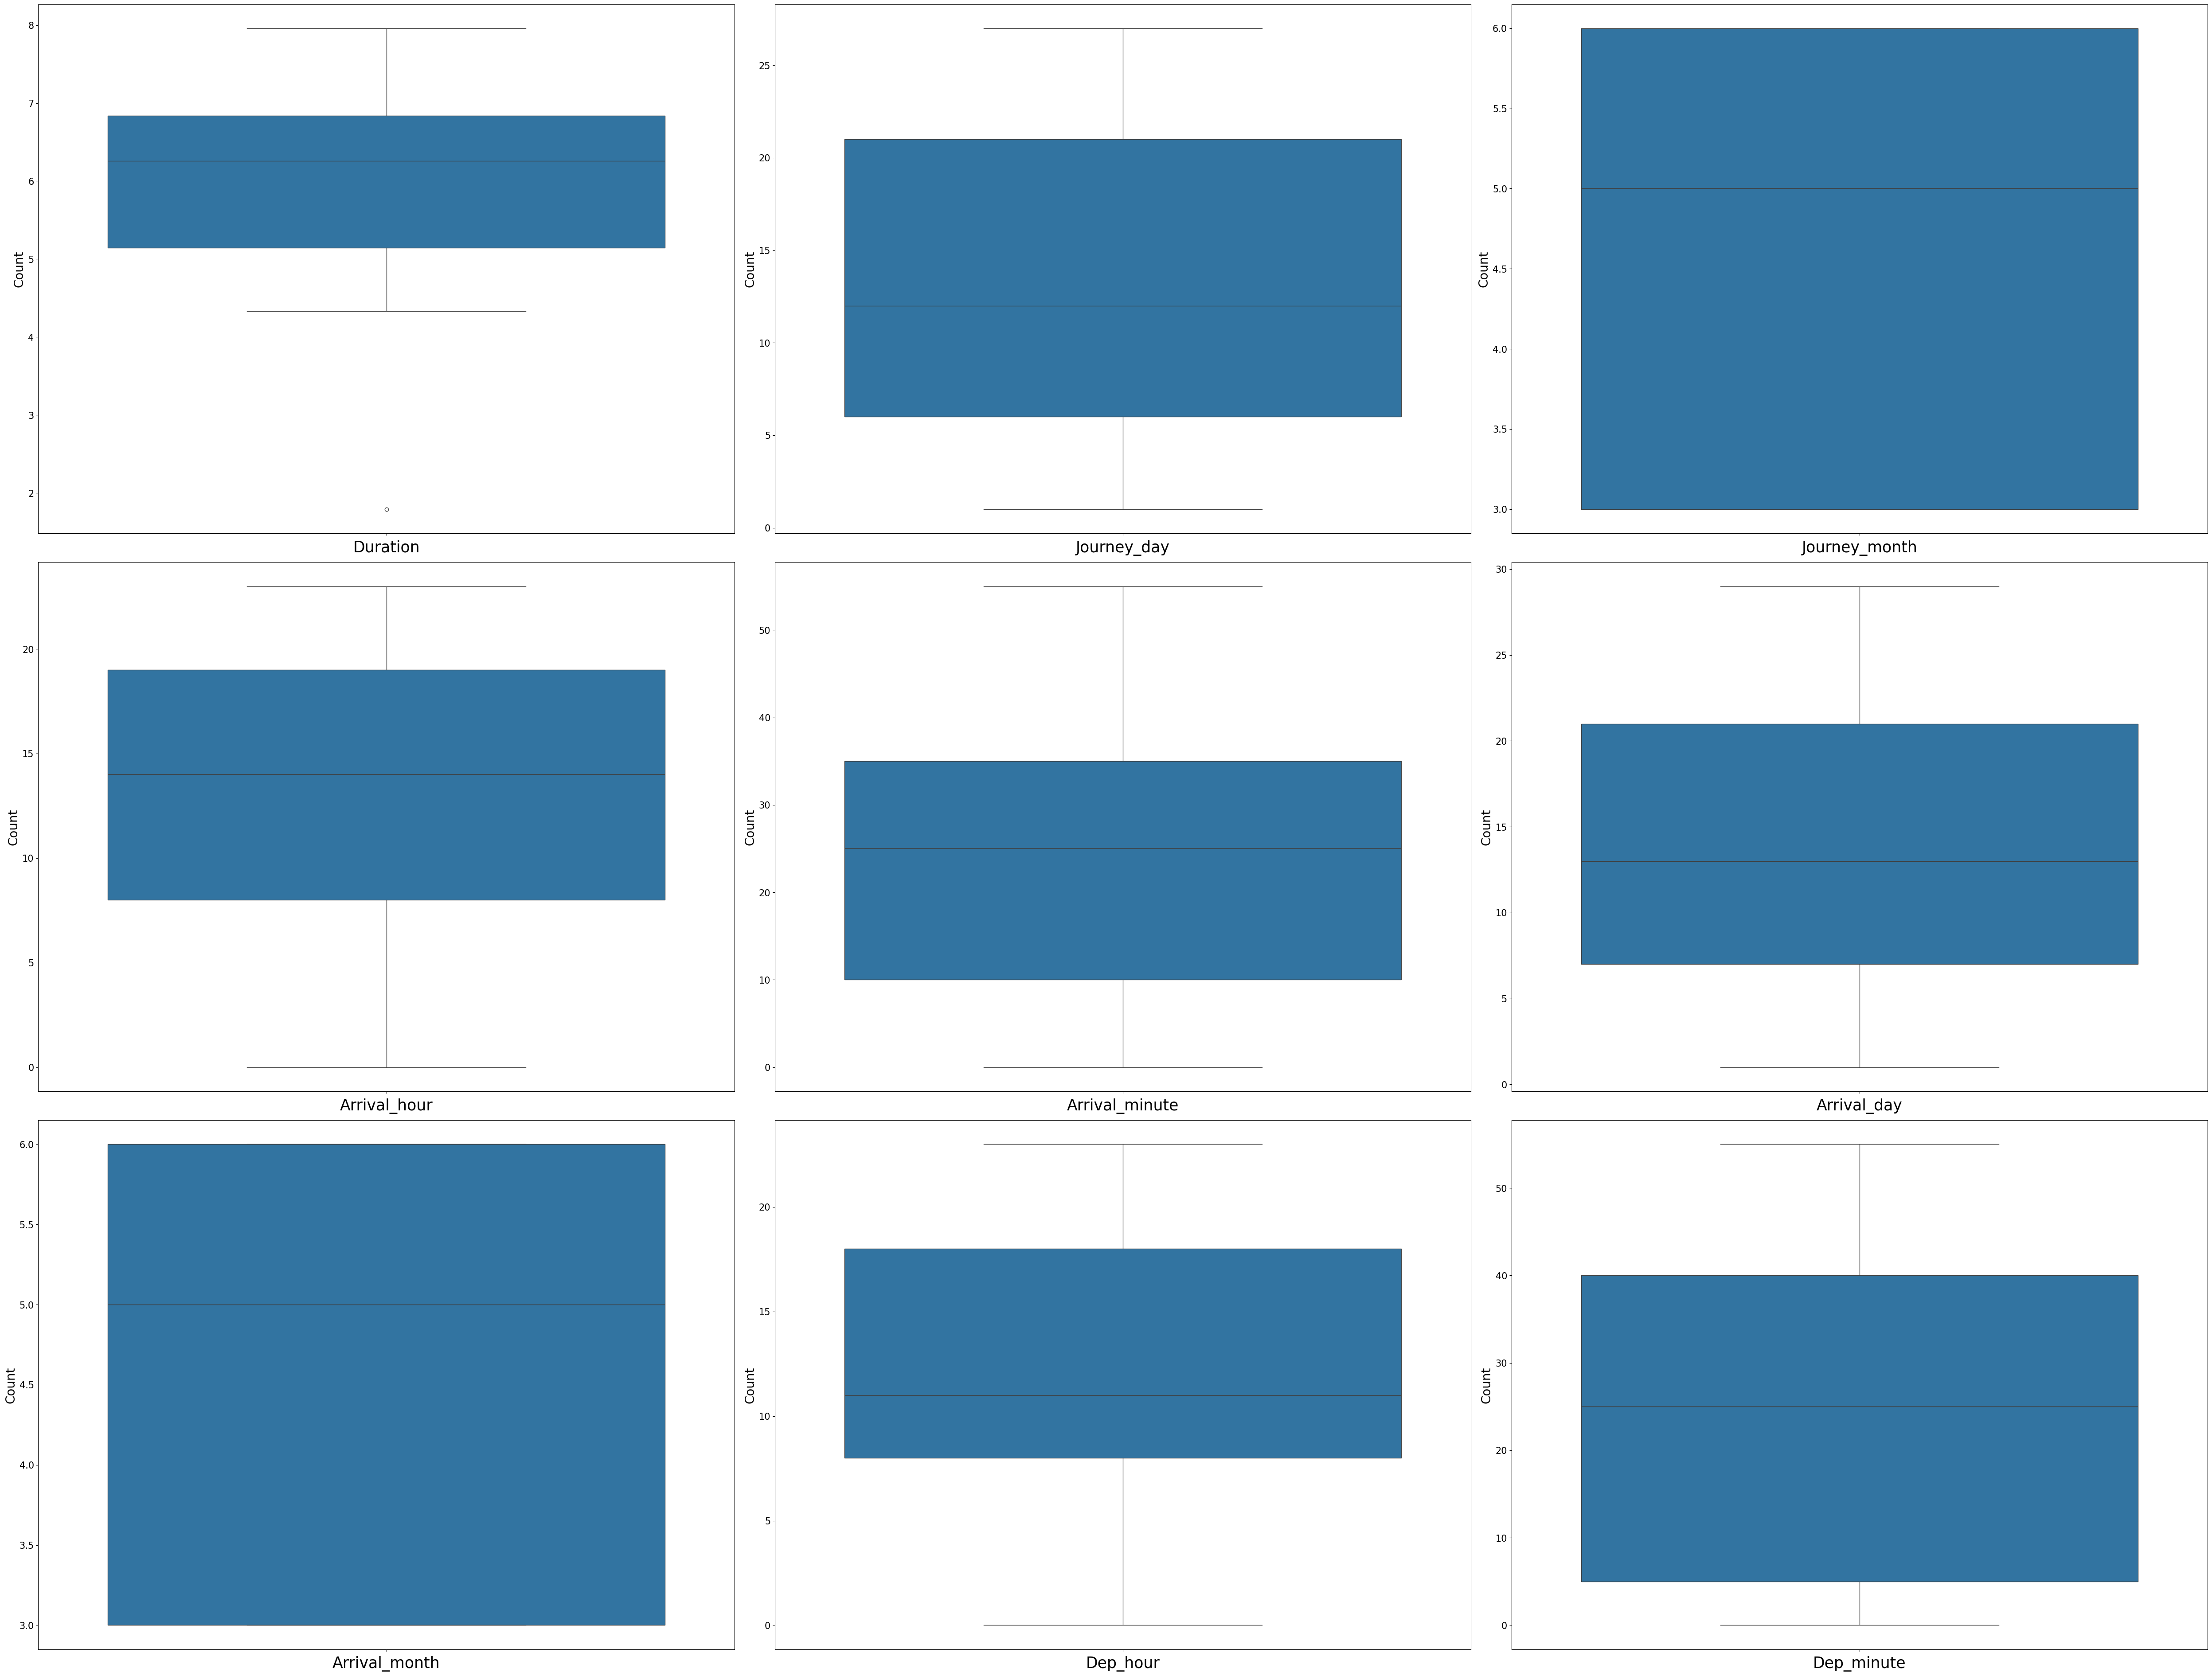

In [40]:
plt.figure(figsize=(50,50))
plot_num = 1

for col in num_cols:
    if plot_num <= 12:
        plt.subplot(4,3,plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=25)
        plt.ylabel("Count",fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    plot_num = plot_num+1
plt.tight_layout()

In [41]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [43]:
x = df.drop('Price', axis=1)
y = df['Price']

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
def adjusted_r2(r2,n,p):
    return 1-((1-r2)*(n-1)/(n-p-1))

In [46]:
n = x_test.shape[0]      # number of rows
p = x_test.shape[1]      # number of features

In [47]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))


MAE: 1923.559180976479
RMSE: 2760.9948227603854
R2 Score: 0.6398079456726524
Adjusted R2: 0.6336332247413266


In [48]:
lr = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# cross-validation (R² score)
scores = cross_val_score(lr, x, y, cv=kf, scoring='r2')

print("R2 Score:", scores)
print("mean:",np.mean(scores))
print("Adjusted R2:", adjusted_r2(np.mean(scores), n, p))

R2 Score: [0.6440123  0.63292043 0.64811797 0.65862657 0.67300523 0.62527318
 0.68905948 0.60644103 0.594564   0.6411013 ]
mean: 0.6413121486804352
Adjusted R2: 0.6351632140863854


In [49]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)


print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))

MAE: 1749.2966142447067
RMSE: 2899.3842448316254
R2 Score: 0.6027951955195228
Adjusted R2: 0.5959859702998574


In [50]:
model=SVR()

param_dist = {
    'C': np.logspace(-2, 3, 50),
    'epsilon': np.linspace(0.01, 0.5, 20),
    'gamma': np.logspace(-3, 1, 50),
    'kernel': ['rbf']
}

random_search = RandomizedSearchCV(
    model,
    param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train,y_train)
best_model = random_search.best_estimator_
y_pred=best_model.predict(x_test)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))

MAE: 1636.994306928278
RMSE: 2869.488344873772
R2 Score: 0.6109442181251015
Adjusted R2: 0.6042746904358175


In [51]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))

MAE: 1239.393393946859
RMSE: 1957.235818965852
R2 Score: 0.8189955492763223
Adjusted R2: 0.815892615835345


In [52]:
model=RandomForestRegressor()
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train,y_train)
best_model = random_search.best_estimator_
y_pred=best_model.predict(x_test)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))

MAE: 1154.0242421897633
RMSE: 1820.8692129877152
R2 Score: 0.8433391604350708
Adjusted R2: 0.8406535460425292


In [53]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))

MAE: 1153.456298828125
RMSE: 1767.9802035090777
R2 Score: 0.8523077368736267
Adjusted R2: 0.849775869505746


In [54]:
model=XGBRegressor()

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train,y_train)
best_model = random_search.best_estimator_
y_pred=best_model.predict(x_test)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))

MAE: 1157.44873046875
RMSE: 1745.8799357344135
R2 Score: 0.8559770584106445
Adjusted R2: 0.8535080936976842


In [55]:
catboost = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    loss_function="RMSE",
    random_seed=42,
    verbose=0
)

catboost.fit(x_train, y_train)

y_pred = catboost.predict(x_test)

print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))

MAE: 1253.0667417599486
RMSE: 1806.7936860898697
R2 Score: 0.845751811569454
Adjusted R2: 0.8431075569106447


In [56]:
model=CatBoostRegressor()
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [300, 500, 800],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 0.5, 1, 2]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train,y_train)
best_model = random_search.best_estimator_
y_pred=best_model.predict(x_test)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))


0:	learn: 4346.7224695	total: 8.36ms	remaining: 6.68s
1:	learn: 4107.8811649	total: 17.2ms	remaining: 6.87s
2:	learn: 3920.6315189	total: 25.5ms	remaining: 6.77s
3:	learn: 3720.2825930	total: 33.1ms	remaining: 6.59s
4:	learn: 3546.8855264	total: 41ms	remaining: 6.52s
5:	learn: 3403.4370101	total: 49.5ms	remaining: 6.55s
6:	learn: 3290.3676654	total: 57.6ms	remaining: 6.52s
7:	learn: 3181.4863447	total: 65.6ms	remaining: 6.49s
8:	learn: 3098.8378344	total: 73.4ms	remaining: 6.45s
9:	learn: 3019.2422976	total: 81.1ms	remaining: 6.41s
10:	learn: 2954.7262652	total: 89ms	remaining: 6.38s
11:	learn: 2900.6043004	total: 96.8ms	remaining: 6.36s
12:	learn: 2855.5666622	total: 105ms	remaining: 6.34s
13:	learn: 2813.3493029	total: 112ms	remaining: 6.3s
14:	learn: 2752.6944999	total: 120ms	remaining: 6.3s
15:	learn: 2703.1124367	total: 128ms	remaining: 6.27s
16:	learn: 2673.9271439	total: 136ms	remaining: 6.26s
17:	learn: 2634.4769578	total: 144ms	remaining: 6.25s
18:	learn: 2599.2066031	total: 1

In [72]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=0)

y_pred = model.predict(x_test)

print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2(r2, n, p))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step   
MAE: 1307.803466796875
RMSE: 1891.239606713015
R2 Score: 0.8309963941574097
Adjusted R2: 0.8280991894858224


In [42]:
df.head(5)

,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Arrival_day,Arrival_month,Dep_hour,Dep_minute,Route_Legs,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Main_Layover_ BOM,Main_Layover_ DEL,Main_Layover_ HYD,Main_Layover_Direct,Main_Layover_Other
0,-1.061980,0,3897,1.237383,-1.467490,-1.800427,-0.890057,0.955843,-1.467490,1.654259,-0.235050,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.003924,2,7662,-1.475239,0.250276,-0.050851,-0.587124,-1.524570,0.250276,-1.303095,1.363492,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1.032815,2,13882,-0.531719,1.109160,-1.363033,0.018744,-0.461536,1.109160,-0.607247,0.031373,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,-0.349844,1,6218,-0.177898,0.250276,1.407129,0.321677,-0.225306,0.250276,0.958411,-1.034321,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,-0.494322,1,13302,-1.475239,-1.467490,1.115533,0.624611,-1.524570,-1.467490,0.610487,1.363492,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
